In [1]:
from sequenzo import *
import pandas as pd

## 

In [2]:
# ------------------------
# Step 0: 定义提取工具函数
# ------------------------

def extract_state_space(sequences):
    return sorted(set(s for seq in sequences for s in seq))

# ------------------------
# Step 1: 读取和准备数据
# ------------------------

df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv")

time_cols = [f"C{i}" for i in range(1, 11)]  # C1~C10

# 假设 'country' 是一列，值为 'India' 或 'US'
india_df = df[df["country"] == "india"].copy()
us_df = df[df["country"] == "us"].copy()

T = len(time_cols)  # 一般是固定 10

# 提取 sequence 列
india_sequences = extract_sequences(india_df, time_cols)
us_sequences = extract_sequences(us_df, time_cols)

india_states = extract_state_space(india_sequences)
us_states = extract_state_space(us_sequences)

# ------------------------
# Step 2: 构建前缀树
# ------------------------

india_tree = build_prefix_tree(india_sequences)
us_tree = build_prefix_tree(us_sequences)

# 为每个国家分别建模
india_model = IndividualDivergence(india_sequences)
us_model = IndividualDivergence(us_sequences)

In [3]:
print('india_tree:', india_tree)
print('us_tree:', us_tree)

india_tree: PrefixTree(max_depth=10, total_prefixes=5804)
us_tree: PrefixTree(max_depth=10, total_prefixes=5517)


In [4]:
df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software


In [5]:
india_prefix_counts = compute_prefix_count(india_tree, T)
india_branching_factors = compute_branching_factor(india_tree, T)
india_js_scores = compute_js_divergence(india_sequences, state_set=india_states)

us_prefix_counts = compute_prefix_count(us_tree, T)
us_branching_factors = compute_branching_factor(us_tree, T)
us_js_scores = compute_js_divergence(us_sequences, state_set=us_states)

In [6]:
# 演示自定义子图标题功能
# 使用完全自定义的标题

# 准备两组数据
custom_groups_data = {
    "IND": {
        "prefix_counts": india_prefix_counts,
        "branching_factors": india_branching_factors,
        "js_scores": india_js_scores
    },
    "USA": {
        "prefix_counts": us_prefix_counts,
        "branching_factors": us_branching_factors,
        "js_scores": us_js_scores
    }
}

# 使用自定义子图标题
plot_system_indicators_multiple_comparison(
    groups_data=custom_groups_data,
    group_names=["India", "United States"],  # 这个仅用于默认标题格式，当有subplot_titles时会被覆盖
    subplot_titles=[
        "India", 
        "United States"
    ],  # 完全自定义的子图标题
    x_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # 可以是年份、时期等
    x_label="Work Years",  # 自定义x轴标签
    legend_loc='lower right',  # 图例位置
    save_as="prefix_system_indicators_comparison"
)

print("✅ 已生成带有自定义标题的对比图")


NameError: name 'plot_system_indicators_multiple_comparison' is not defined

In [ ]:
# ------------------------
# Step 4: 计算个体层指标
# ------------------------

# 赋值回 dataframe
india_df["diverged"] = india_model.compute_diverged()
india_df["first_divergence_year"] = india_model.compute_first_divergence_year()
india_df["prefix_rarity_score"] = india_model.compute_prefix_rarity_score()
india_df["path_uniqueness"] = india_model.compute_path_uniqueness()

us_df["diverged"] = us_model.compute_diverged()
us_df["first_divergence_year"] = us_model.compute_first_divergence_year()
us_df["prefix_rarity_score"] = us_model.compute_prefix_rarity_score()
us_df["path_uniqueness"] = us_model.compute_path_uniqueness()

# 合并回总数据
df = pd.concat([india_df, us_df], ignore_index=True)

In [ ]:
df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,diverged,first_divergence_year,prefix_rarity_score,path_uniqueness
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,7.070030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software,0,NaN,4.528812,0
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research,1,3.0,64.726362,3
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software,1,6.0,42.500654,0


First divergence Year 柱状图对比

first_divergence_year 是一个事件变量，只在 diverged == 1 的个体上有意义，因此在 diverged == 0 的行中为 NaN 是完全合理的。

为了避免图像误导或报错，我们在可视化时应该：

* 仅绘制非 NaN 的 divergence_year

* 并区分国家以便对比

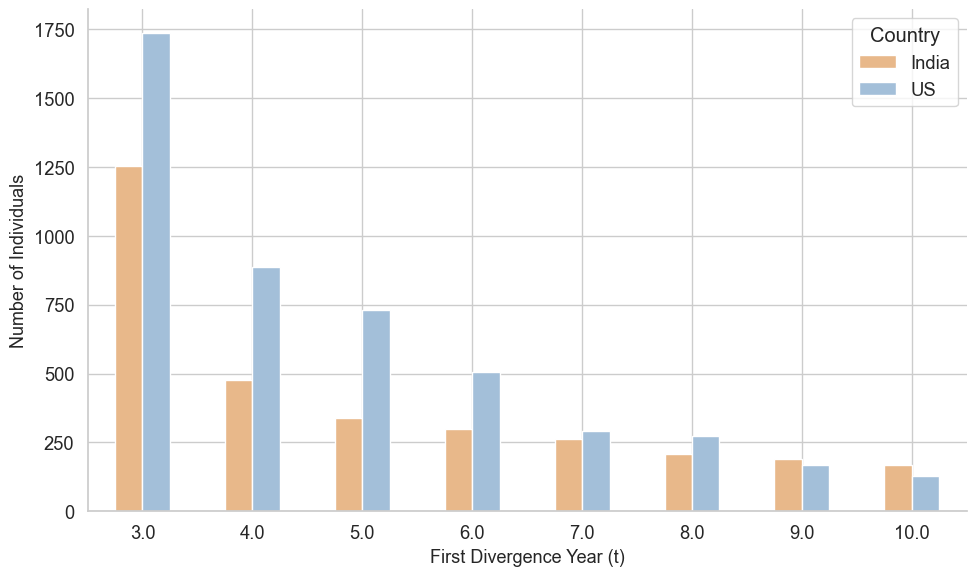

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 只保留 diverged 个体
diverged_df = df[df["diverged"] == 1].copy()

# 分国家计数
vc_divergence = diverged_df.groupby("country")["first_divergence_year"].value_counts().unstack().fillna(0).T

# 重命名列为想要的图例标签
vc_divergence = vc_divergence.rename(columns={"india": "India", "us": "US"})

# 设置画布
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 6))

india_color = "#E8B88A"
us_color = "#A3BFD9"

# 绘图（堆叠或并排任选），莫奈柔色调
vc_divergence.plot(
    kind="bar",
    ax=ax,
    color=[india_color, us_color]  # Monet-style: India / US
    # color=["#A6C1A9", "#C6A5CF"], # 薰衣草搭配颜色
)

# 设置标题与标签
# ax.set_title("Divergence Year Distribution by Country", fontsize=16)
ax.set_xlabel("First Divergence Year (t)", fontsize=13)
ax.set_ylabel("Number of Individuals", fontsize=13)
plt.xticks(rotation=0)
plt.legend(title="Country")
sns.despine()
plt.tight_layout()
plt.savefig("First Divergence Year Distribution by Country", 
            dpi=300, 
            bbox_inches='tight')
plt.show()